In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:
#read df from csv file
df = pd.read_csv('cleaned_data.csv',index_col=False)
df

,Has_Diabetes,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,False,True,True,True,2389.0,False,False,False,0.0,True,1.0,0.0,2.0,3.0,False,False,11.0,4.0
1,False,True,True,True,2500.0,True,False,False,0.0,True,2.0,0.0,3.0,0.0,True,False,11.0,4.0
2,True,False,True,False,2468.0,True,False,False,0.0,True,1.0,0.0,3.0,0.0,False,True,13.0,8.0
3,False,False,True,False,2569.0,True,False,False,15.0,False,1.0,0.0,3.0,0.0,False,False,7.0,7.0
4,True,True,True,True,2850.0,False,False,False,0.0,False,1.0,0.0,4.0,0.0,True,False,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140618,False,True,True,True,2780.0,True,False,False,0.0,False,2.0,0.0,3.0,0.0,False,False,11.0,7.0
140619,False,False,True,True,2728.0,False,False,False,3.0,False,4.0,8.0,1.0,0.0,False,True,6.0,4.0
140620,False,False,True,True,3054.0,True,False,False,0.0,False,2.0,1.0,4.0,0.0,True,True,6.0,1.0
140621,False,True,True,False,4229.0,False,False,False,4.0,True,2.0,0.0,3.0,14.0,False,True,3.0,8.0


In [7]:
diabetes = 'Has_Diabetes'
bp = 'High_BP'
check_cho = 'Checked_Cho'
told_high_cho = 'Told_High_Cho'
bmi = 'BMI'
smoker = 'Smoker'
stroke = 'Stroke'
heart_attack = 'Heart_Attack'
phys_health = 'Physical_Health'
recent_exercise = 'Recent_Exercise'
avg_drnk = 'Avg_Drink'
five_or_more='5_or_More_Drinks'
gen_hlth ='Gen_Health'
ment_hlth = 'Mental_Health'
diff_walk = 'Diff_Walking'
sex = 'Sex'
age = 'Age'
income = 'Income'

In [22]:
inputs = df.drop(diabetes, axis=1)
target = df[diabetes]



In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs,target, test_size=0.2, random_state=125
)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [26]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8223644444444445
F1 Score: 0.805120338680677


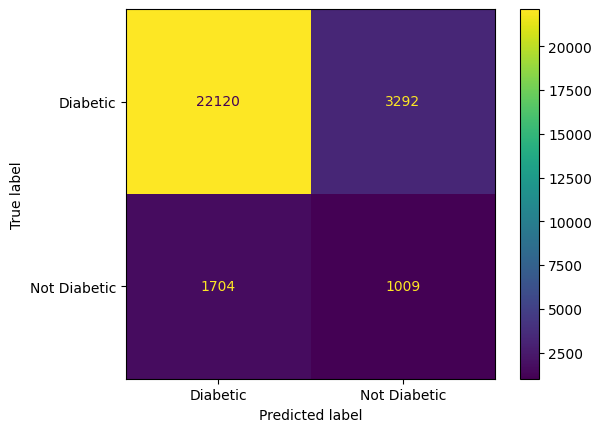

In [27]:
labels = ["Diabetic", "Not Diabetic"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()